In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [8]:
df = pd.read_csv('clean_final_data.csv')

Modeling

In [9]:
# combine X column to single one to do countvectorizer() - only take 1 column
df['fulltext'] = df['title'] + ' ' + df['selftext']
# set X and y
X = df['fulltext']
y = df['subreddit']

In [10]:
# baseline model
y.value_counts(normalize=True)

cars      0.52233
travel    0.47767
Name: subreddit, dtype: float64

In [11]:
# split the data into the traininig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [12]:
# instantiate countvectorizer
# remove stopwords
from sklearn.feature_extraction import text 

my_words = ['im', 'ive', 'dont']
stop_words = text.ENGLISH_STOP_WORDS.union(my_words)
cvec = CountVectorizer(stop_words=stop_words)

In [61]:
# fit a transform the vectorizer
Xc_train = cvec.fit_transform(X_train)   
Xc_test = cvec.transform(X_test)

Naive Bayes and CountVectorization

In [14]:
# naive Bayes
nb = Pipeline([
    ('cvec', CountVectorizer() ),
    ('nb', MultinomialNB())
])

In [15]:
pipe_params = {
    'cvec__max_features': [1000, 2000, 3000, 4000, 5000],
    'cvec__min_df': [1, 2, 3, 4],
    'cvec__max_df': [0.95, 0.9, 1],
    'cvec__ngram_range': [(1,1), (1,2)],
    
                }

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [17]:
# Instantiate GridsearchCV
grid = GridSearchCV(nb,
                   pipe_params,
                   cv = kf)

In [18]:
# Fit GridSearchCV to training data
grid.fit(X_train, y_train)   # think about why X_train, not Xs_train! 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.95, 0.9, 1],
                         'cvec__max_features': [1000, 2000, 3000, 4000, 5000],
                         'cvec__min_df': [1, 2, 3, 4],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [19]:
def model_evaluation(model):
    best_parameters= model.best_params_
    best_estimator = model.best_estimator_
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    model_preds = model.predict(X_test)
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', display_labels = ['cars', 'travel']) 
    Accuracy = accuracy_score(y_test, model_preds)
    Recall = recall_score(y_test, model_preds,  pos_label='cars')
    Precision = precision_score(y_test, model_preds,  pos_label='cars')
    F1_score = f1_score(y_test, model_preds, pos_label='cars')
    ROC_AUC_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    # ROC
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0,1], [0,1],label = 'baseline', linestyle = '--')
    plt.legend();
    return f'best parameters: {best_parameters}', f'best estimators: {best_estimator}', f'train score: {train_score}', f'test score: {test_score}', f'model predictions: {model_preds}', f'Accuracy: {Accuracy}', f'Sensitivity: {Recall}', f'Precision: {Precision}', f'F1 score: {F1_score}', f'AUC Score: {ROC_AUC_score}'

("best parameters: {'cvec__max_df': 0.95, 'cvec__max_features': 5000, 'cvec__min_df': 4, 'cvec__ngram_range': (1, 1)}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.95, max_features=5000, min_df=4)),\n                ('nb', MultinomialNB())])",
 'train score: 0.9929432519847103',
 'test score: 0.9849108367626886',
 "model predictions: ['cars' 'cars' 'cars' ... 'cars' 'cars' 'travel']",
 'Accuracy: 0.9849108367626886',
 'Sensitivity: 0.9855643044619422',
 'Precision: 0.9855643044619422',
 'F1 score: 0.9855643044619422',
 'AUC Score: 0.9980729779467222')

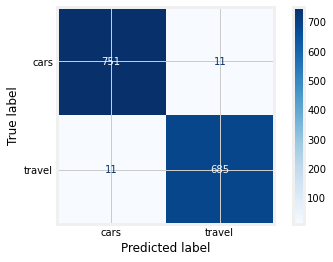

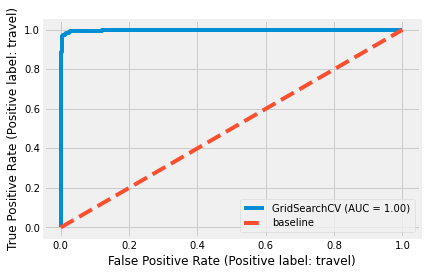

In [20]:
model_evaluation(grid)

#LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
logit = Pipeline([
    ('cvec', CountVectorizer() ),
    ('logit', LogisticRegression(penalty='none',
               C = 1.0,
               solver='lbfgs',
               max_iter=1000,
               verbose=0))
])

In [22]:
logit.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()),
                ('logit', LogisticRegression(max_iter=1000, penalty='none'))])

train score: 1.0
test score: 0.9801097393689986
model predictions: ['cars' 'cars' 'cars' ... 'cars' 'travel' 'travel']
Accuracy: 0.9801097393689986
Sensitivity: 0.984251968503937
Precision: 0.9778357235984355
F1 score: 0.9810333551340745
AUC Score: 0.9980409237638398


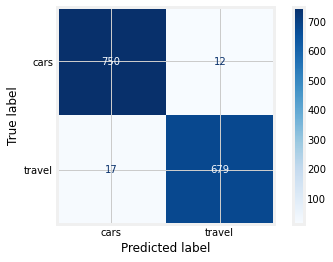

In [75]:
# since logsitic Regression with pipeline has no attribute 'best_params_', 'best_estimators_',
# we buid these calculations
train_score = logit.score(X_train, y_train)
test_score = logit.score(X_test, y_test)
logit_preds = logit.predict(X_test)
plot_confusion_matrix(logit, X_test, y_test, cmap='Blues', display_labels = ['cars', 'travel']) 
Accuracy = accuracy_score(y_test, logit_preds)
Recall = recall_score(y_test, logit_preds,  pos_label='cars')
Precision = precision_score(y_test, logit_preds,  pos_label='cars')
F1_score = f1_score(y_test, logit_preds, pos_label='cars')
ROC_AUC_score = roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1])
print(f'train score: {train_score}')
print(f'test score: {test_score}'), 
print(f'model predictions: {logit_preds}')
print(f'Accuracy: {Accuracy}')
print(f'Sensitivity: {Recall}')
print(f'Precision: {Precision}')
print(f'F1 score: {F1_score}')
print(f'AUC Score: {ROC_AUC_score}')  

### lasso Regression

In [26]:
from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform, loguniform
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=6500,
    min_df=5,
    ngram_range=(1, 2),
    )),
    ('ss', StandardScaler(with_mean=False)),
    ('lasso', LogisticRegression(penalty='l1',
                                 solver='liblinear'
                                 ))])

params = {
    'lasso__C': loguniform(1.0000001, 20)
}

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
lasso = RandomizedSearchCV(pipe,
                            params,
                              n_iter=200,
                              cv=5,
                              n_jobs=-1,
                              verbose=True,
                              random_state=42)

lasso.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=6500,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('ss',
                                              StandardScaler(with_mean=False)),
                                             ('lasso',
                                              LogisticRegression(penalty='l1',
                                                                 solver='liblinear'))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'lasso__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe41dadc790>},
           

("best parameters: {'lasso__C': 4.588447272802159}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.325, max_features=6500, min_df=5,\n                                 ngram_range=(1, 2))),\n                ('ss', StandardScaler(with_mean=False)),\n                ('lasso',\n                 LogisticRegression(C=4.588447272802159, penalty='l1',\n                                    solver='liblinear'))])",
 'train score: 1.0',
 'test score: 0.9684499314128944',
 "model predictions: ['cars' 'cars' 'cars' ... 'cars' 'cars' 'travel']",
 'Accuracy: 0.9684499314128944',
 'Sensitivity: 0.9776902887139107',
 'Precision: 0.962532299741602',
 'F1 score: 0.9700520833333333',
 'AUC Score: 0.9945017648655987')

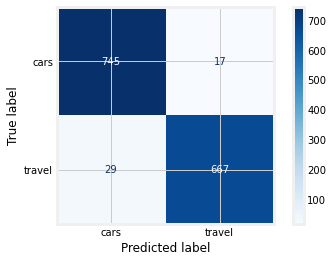

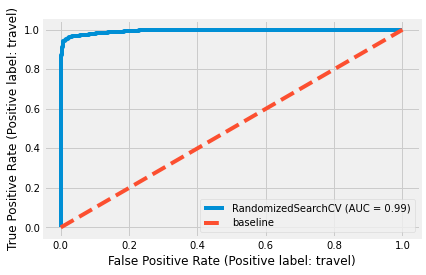

In [28]:
model_evaluation(lasso)

#Ridge Logistic Regression

In [29]:
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=6500,
    min_df=5,
    ngram_range=(1, 2),
   )),
    ('ss', StandardScaler(with_mean=False)),
    ('ridge', LogisticRegression(penalty='l2',
                                 solver='liblinear'
                                 ))])

ridge_params = {
    'ridge__C': loguniform(1.0000001, 20)
}

In [30]:
ridge = RandomizedSearchCV(pipe,
                              ridge_params,
                              n_iter=75,
                              cv=5,
                              n_jobs=-1,
                              verbose=True,
                              random_state=42)

ridge.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=6500,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('ss',
                                              StandardScaler(with_mean=False)),
                                             ('ridge',
                                              LogisticRegression(solver='liblinear'))]),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'ridge__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe4192df730>},
                   random_state=42, verbose=True)

("best parameters: {'ridge__C': 1.1085123587703856}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.325, max_features=6500, min_df=5,\n                                 ngram_range=(1, 2))),\n                ('ss', StandardScaler(with_mean=False)),\n                ('ridge',\n                 LogisticRegression(C=1.1085123587703856, solver='liblinear'))])",
 'train score: 1.0',
 'test score: 0.9595336076817559',
 "model predictions: ['cars' 'cars' 'cars' ... 'cars' 'cars' 'travel']",
 'Accuracy: 0.9595336076817559',
 'Sensitivity: 0.9671916010498688',
 'Precision: 0.9559014267185474',
 'F1 score: 0.9615133724722766',
 'AUC Score: 0.9914471897909314')

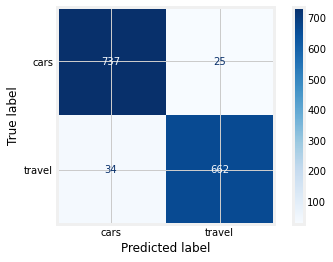

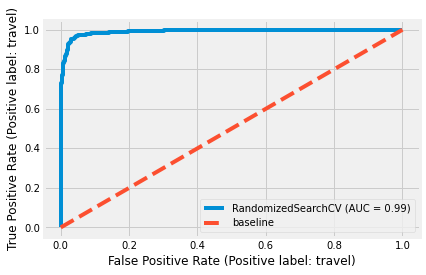

In [31]:
model_evaluation(ridge)

#KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=6500,
    min_df=5,
    ngram_range=(1, 2),
   )),
    ('knn', KNeighborsClassifier())])

knn_params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

In [33]:
knn =  RandomizedSearchCV(
    pipe,
    knn_params,
    n_iter=75,
    n_jobs=-1,
    cv=5,
    verbose=0,
    random_state=42,
)

knn.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 12 is smaller than n_iter=75. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=6500,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'knn__n_neighbors': [3, 5, 7],
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42)

("best parameters: {'knn__weights': 'distance', 'knn__p': 2, 'knn__n_neighbors': 3}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.325, max_features=6500, min_df=5,\n                                 ngram_range=(1, 2))),\n                ('knn',\n                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])",
 'train score: 1.0',
 'test score: 0.6550068587105624',
 "model predictions: ['cars' 'travel' 'cars' ... 'travel' 'travel' 'travel']",
 'Accuracy: 0.6550068587105624',
 'Sensitivity: 0.5065616797900262',
 'Precision: 0.7524366471734892',
 'F1 score: 0.6054901960784314',
 'AUC Score: 0.7734844028117175')

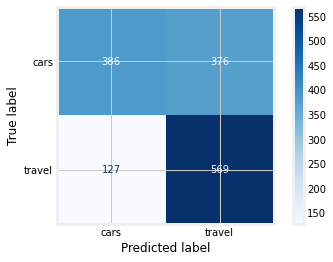

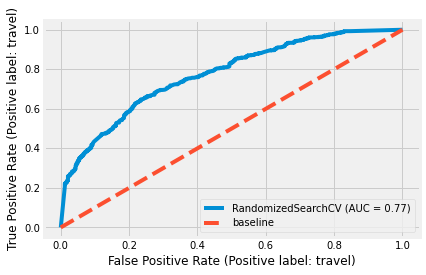

In [34]:
model_evaluation(knn)

In [65]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=6500,
    min_df=5,
    ngram_range=(1, 2),
   )),
     ('rf', RandomForestClassifier(random_state = 42))])

rf_params = {
             'rf__n_estimators': [100,200,300,400,500],
          'rf__max_depth': [10,20,30,40,50],
          'rf__min_samples_split': [20,30,40,50, 60],
          'rf__min_samples_leaf': [1,2,4,5,10,20],
          'rf__max_features': ['auto', 'sqrt']
              }

rf = RandomizedSearchCV(estimator=pipe, 
                        param_distributions = pipe_params,
                        random_state=42,
                        cv=5)

In [66]:
rf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=6500,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'cvec__max_df': [0.95, 0.9, 1],
                                        'cvec__max_features': [1000, 2000, 3000,
                                                               4000, 5000],
                                        'cvec__min_df': [1, 2, 3, 4],
                                        'cvec__ngram_range': [(1, 1), (1, 2)]},
            

("best parameters: {'cvec__ngram_range': (1, 2), 'cvec__min_df': 4, 'cvec__max_features': 1000, 'cvec__max_df': 0.9}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.9, max_features=1000, min_df=4,\n                                 ngram_range=(1, 2))),\n                ('knn', KNeighborsClassifier())])",
 'train score: 0.9223757718318142',
 'test score: 0.8367626886145405',
 "model predictions: ['cars' 'cars' 'cars' ... 'travel' 'travel' 'travel']",
 'Accuracy: 0.8367626886145405',
 'Sensitivity: 0.8359580052493438',
 'Precision: 0.8493333333333334',
 'F1 score: 0.8425925925925927',
 'AUC Score: 0.9129530953027423')

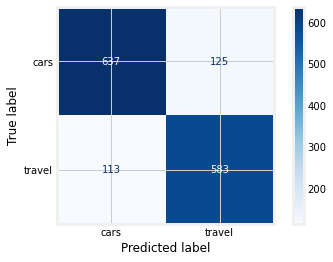

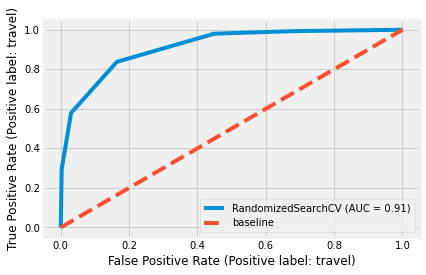

In [74]:
model_evaluation(rf)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
pipe = Pipeline([('cvec', CountVectorizer(
    max_df=.325,
    max_features=6500,
    min_df=5,
    ngram_range=(1, 2),
    )),
    ('ss', StandardScaler(with_mean=False)),
    ('svc', svm.SVC(probability=True, ))])

svc_params = {
    'svc__C': loguniform(.00001, 50),
    'svc__gamma': ['scale', 'auto']
}
GridSearchCV
svc = RandomizedSearchCV(pipe,
                            svc_params,
                            n_iter=75,
                            cv=5,
                            n_jobs=-1,
                            verbose=True,
                            random_state=42)

In [78]:
svc.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('cvec',
                                              CountVectorizer(max_df=0.325,
                                                              max_features=6500,
                                                              min_df=5,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('ss',
                                              StandardScaler(with_mean=False)),
                                             ('svc', SVC(probability=True))]),
                   n_iter=75, n_jobs=-1,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe41f88a880>,
                                        'svc__gamma': ['scale', 'auto']},
                   random_state=42, verbose=True)

In [81]:
import time
start = time.process_time()
# your code here    
print(time.process_time() - start)

0.00010500000001911758


5.7999999967250915e-05


("best parameters: {'svc__C': 1.5580863867032468, 'svc__gamma': 'auto'}",
 "best estimators: Pipeline(steps=[('cvec',\n                 CountVectorizer(max_df=0.325, max_features=6500, min_df=5,\n                                 ngram_range=(1, 2))),\n                ('ss', StandardScaler(with_mean=False)),\n                ('svc',\n                 SVC(C=1.5580863867032468, gamma='auto', probability=True))])",
 'train score: 0.9994119376653925',
 'test score: 0.958161865569273',
 "model predictions: ['cars' 'cars' 'cars' ... 'cars' 'cars' 'travel']",
 'Accuracy: 0.958161865569273',
 'Sensitivity: 0.9763779527559056',
 'Precision: 0.9453621346886912',
 'F1 score: 0.960619754680439',
 'AUC Score: 0.994141626693215')

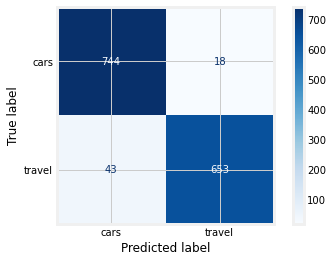

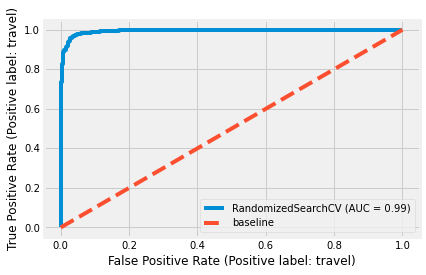

In [85]:
import time
start = time.process_time()
print(time.process_time() - start)
model_evaluation(svc)

#Model comparison

Multinominal NaiveBayes:  Accuracy: 0.9849108367626886
Logistic Regression: Accuracy: 0.9801097393689986
Lasso Regression :  Accuracy: 0.9684499314128944
Ridge Regression:  Accuracy: 0.9595336076817559
KNN:  Accuracy: 0.6550068587105624
Random Forest:  Accuracy: 0.96639231824417
SVM:  Accuracy: 0.958161865569273


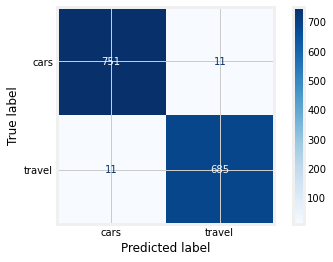

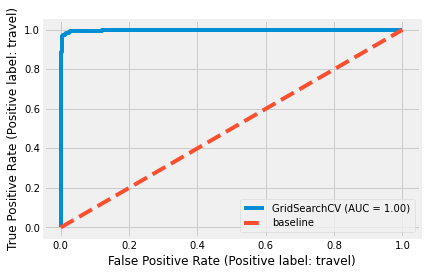

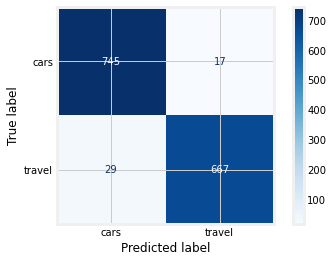

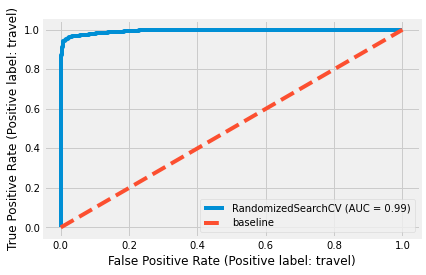

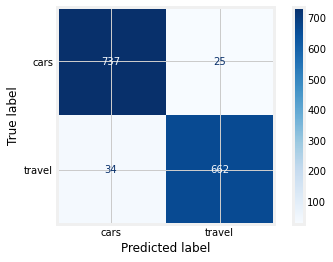

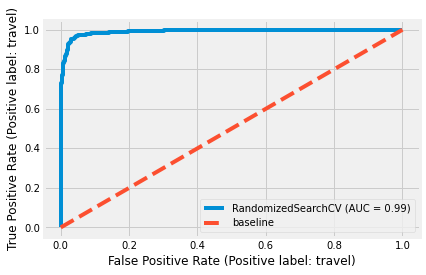

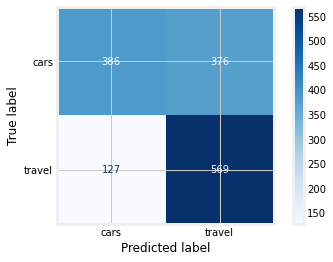

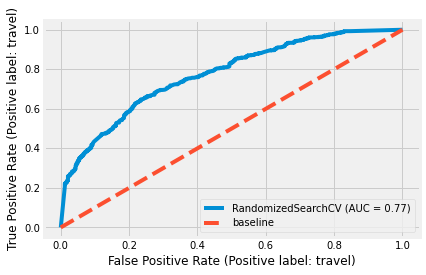

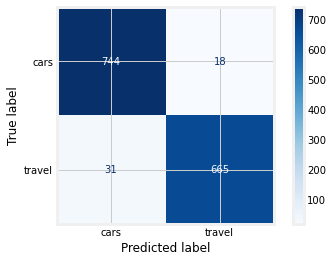

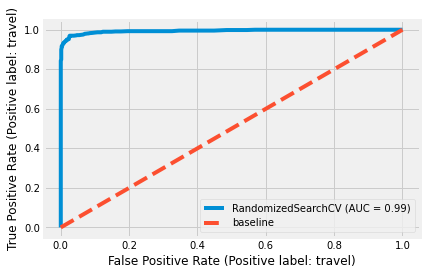

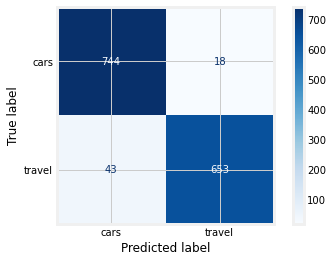

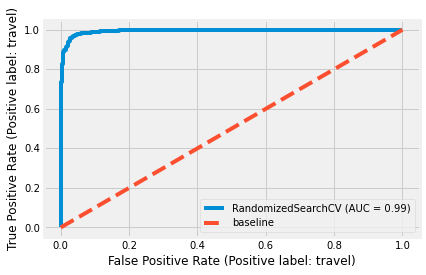

In [86]:
print('Multinominal NaiveBayes: ', model_evaluation(grid)[5])
print(f'Logistic Regression: Accuracy: {Accuracy}')
print('Lasso Regression : ', model_evaluation(lasso)[5])
print('Ridge Regression: ' , model_evaluation(ridge)[5])
print('KNN: ' , model_evaluation(knn)[5])
print('Random Forest: ' , model_evaluation(rf)[5])
print('SVM: ' , model_evaluation(svc)[5])